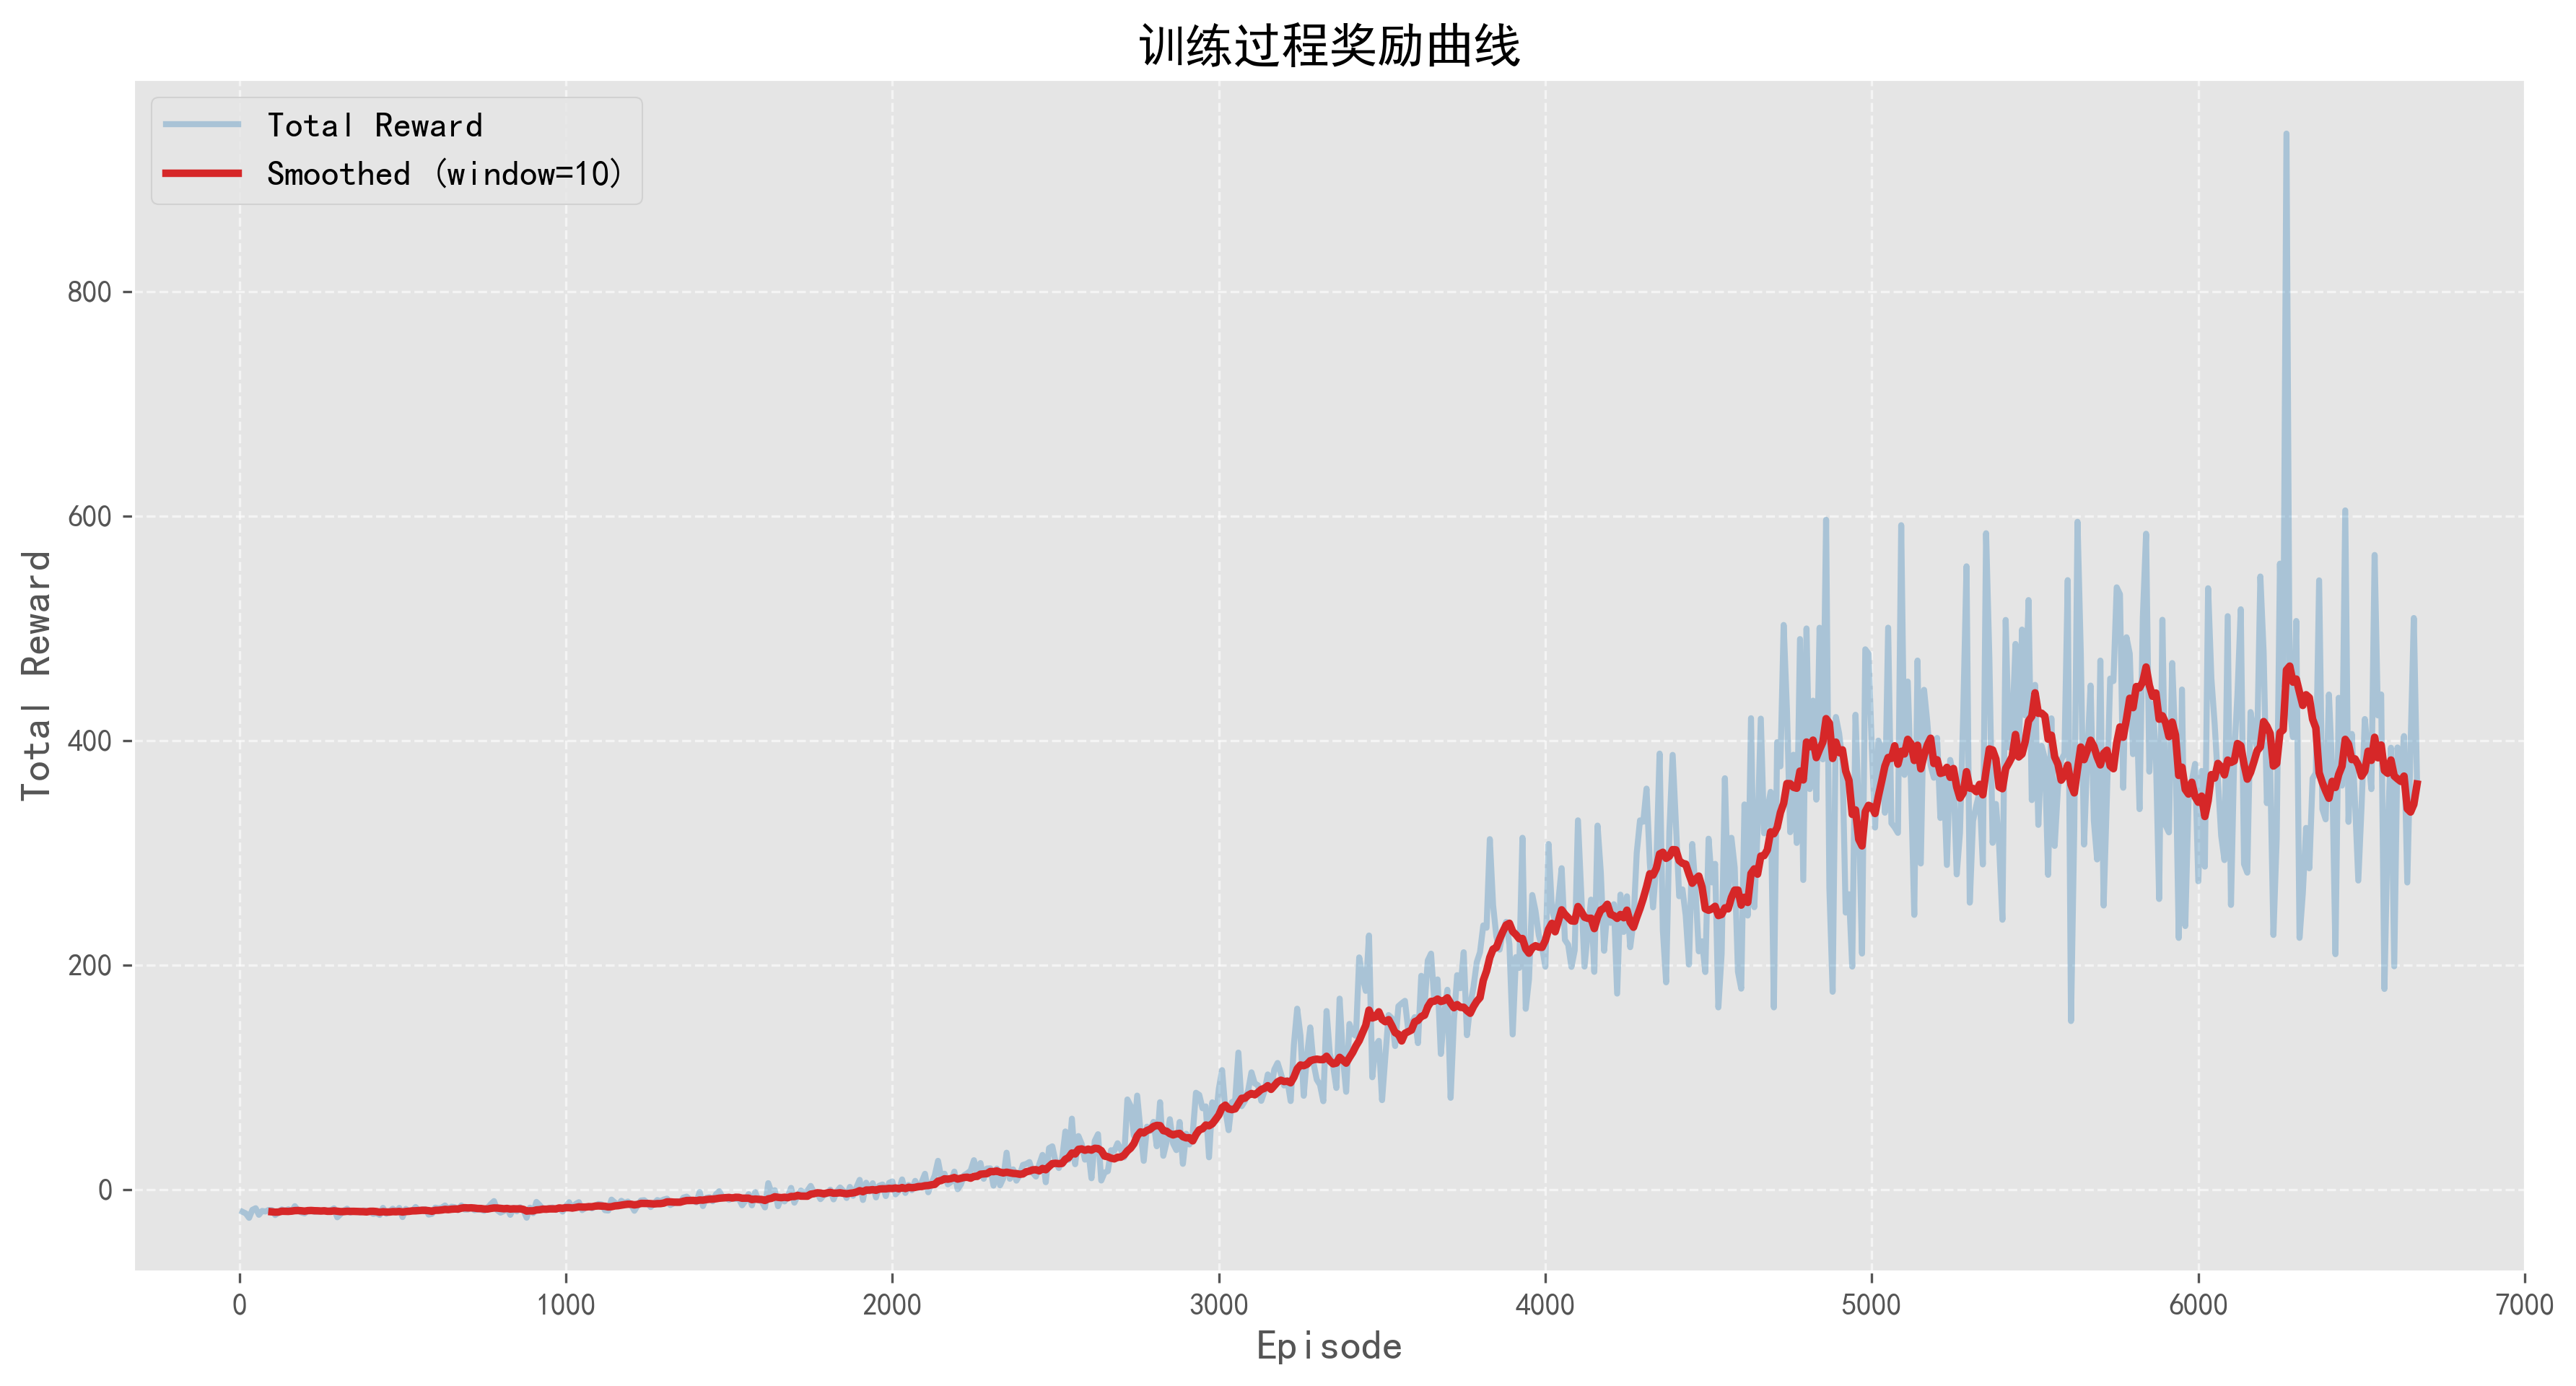

In [9]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 读取日志文件
with open('a.txt', encoding='utf-8') as f:
    lines = f.readlines()

episodes = []
rewards = []

# 正则提取
for line in lines:
    match = re.search(r'Episode (\d+), Total Reward: ([\d\.\-]+)', line)
    if match:
        episodes.append(int(match.group(1)))
        rewards.append(float(match.group(2)))

# 平滑处理（滑动平均）
window = 10  # 平滑窗口大小
if len(rewards) >= window:
    rewards_smooth = np.convolve(rewards, np.ones(window)/window, mode='valid')
    episodes_smooth = episodes[window-1:]
else:
    rewards_smooth = rewards
    episodes_smooth = episodes

# 使用ggplot风格美化
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,6.5),dpi=300)
plt.plot(episodes, rewards, label='Total Reward', alpha=0.3, linewidth=2, color='#1f77b4')
plt.plot(episodes_smooth, rewards_smooth, label=f'Smoothed (window={window})', color='#d62728', linewidth=2.5)
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)
plt.title('训练过程奖励曲线', fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()